FIAP - Machine Learning & Modelling

# Aula 05 - Árvores de decisão 

Vamos começar a desenvolver modelos de Machine Learning em Python, utilizando a biblioteca [_scikit-learn_](https://scikit-learn.org/stable/index.html). Nesta aula utillizaremos a famosa base de dados do Titanic, disponível no [Kaggle](https://www.kaggle.com/c/titanic). Nosso objetivo é desenvolver um modelo para predizer sobreviventes do naufrágio. 

Construiremos diversos modelos preditivos ao longo das aulas, aprendendo na prática as semelhanças e diferenças entre eles. 


**Objetivos de aprendizagem**:

- Recapitular o ciclo de desenvolvimento de Data Science, desde a elaboração da hipótese até a apresentação do resultado
- Exercitar o ciclo na prática, com o desenvolvimento de um modelo preditivo 
- Conhecer as nuances práticas do modelo supervisionado de classificação baseado em árvore de decisão 
- Se familiarizar com uma das principais bibliotecas de Python para Machine Learning 

In [6]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import matplotlib.pyplot as plt

# Metodo para separação de TREINO e TESTE
from sklearn.model_selection import train_test_split

# Algoritimos de Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Visualização da árvore
from sklearn.tree import plot_tree

# Metrica de avaliação 
from sklearn.metrics import accuracy_score

%matplotlib inline

### Leitura da base de TREINO 

In [2]:
df = pd.read_csv(r"DATASETS\titanic.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'DATASETS\\titanic.csv'

In [ ]:
df.head(5)

In [ ]:
df["Pclass"]

In [ ]:
df.info()

In [ ]:
df.describe()

### Limpeza da base de TREINO 
- Usar apenas as features de interesse : *Survived, Age, Pclass, Sex*
- Remover linhas sem informação (NA)
- Transformar strings em dados numéricos

In [3]:
df.drop_duplicates(inplace=True)

NameError: name 'df' is not defined

In [4]:
df.dropna(inplace=True)

NameError: name 'df' is not defined

In [5]:
df.shape

NameError: name 'df' is not defined

Expressão lambda para definir como a coluna SEX deve ter os valores alterados

Esta expressão tem o mesmo comportamento da seguinte função: 

```python
def sexo(x):
    if x == "male":
        return 0
    else:
        return 1
```

In [16]:
df["Sex"].unique()

array(['female', 'male'], dtype=object)

In [17]:
def sexo(x):
    if x == "male":
        return 0
    else:
        return 1

In [19]:
df["Sex"] = df["Sex"].apply(sexo)

In [20]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,C103,S


In [21]:
df = df[ ["Survived", "Age", "Pclass", "Sex"] ]

In [22]:
df.head(5)

,Survived,Age,Pclass,Sex
1,1,38.0,1,1
3,1,35.0,1,1
6,0,54.0,1,0
10,1,4.0,3,1
11,1,58.0,1,1


### Machine learning (criação dos modelos)
Principais passos: 
- dividir os dados entre treino e teste
- escolher qual modelo (algoritmo) utilizar
- criar o modelo em si (treino)
- avaliar o "poder preditivo" do método 

In [23]:
X = df.drop(columns=["Survived"]) # Dados
y = df["Survived"]                # Label

In [24]:
X

,Age,Pclass,Sex
1,38.0,1,1
3,35.0,1,1
6,54.0,1,0
10,4.0,3,1
11,58.0,1,1
...,...,...,...
871,47.0,1,1
872,33.0,1,0
879,56.0,1,1
887,19.0,1,1


In [25]:
y

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

Aqui fazemos a separação entre TREINO e TESTE, efetivamente. Estamos pedindo uma divisão entre 25% dos dados para o TESTE e os outros 75% para o TREINO. Aqui existe uma separação aleatória entre os dados, cuja semente do gerador aleatório é o número 42. Os dados estão no datatrame **X** e os labels no dataframe **y**. 

Os resultados serão: 
- X_train = os dados do TREINO
- X_test = os dados do TESTE
- y_train = os labels do TREINO
- y_test = os labels do TESTE

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.25,
                                                   random_state=42)

In [32]:
X

,Age,Pclass,Sex
1,38.0,1,1
3,35.0,1,1
6,54.0,1,0
10,4.0,3,1
11,58.0,1,1
...,...,...,...
871,47.0,1,1
872,33.0,1,0
879,56.0,1,1
887,19.0,1,1


In [33]:
X_train.shape

(137, 3)

In [34]:
X_test.shape

(46, 3)

Agora começamos a criar os modelos preditivos. É uma boa prática padronizarmos os dados, mas aqui estamos com uma base bem comportada, então não vamos nos preocupar com isso, podendo ir direto para as modelagens. 

Para construir um **classificador baseado em árvore de decisão**, chamamos o construtor da classe "DecisionTreeClassifier()", realizamos o treinamento do modelo com os dados e labels do TREINO e na sequência obtemos os valores **preditos** do TESTE com o método "predict()"

In [36]:
# Arvore 
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
Y_pred_label = tree.predict(X_test)

In [37]:
# Quais são as classes? 
tree.classes_

array([0, 1], dtype=int64)

In [38]:
# Quais são os labels preditos? 
Y_pred_label

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0], dtype=int64)

In [39]:
# Qual a taxa de acerto? 
accuracy_score(y_test, Y_pred_label)

0.717391304347826

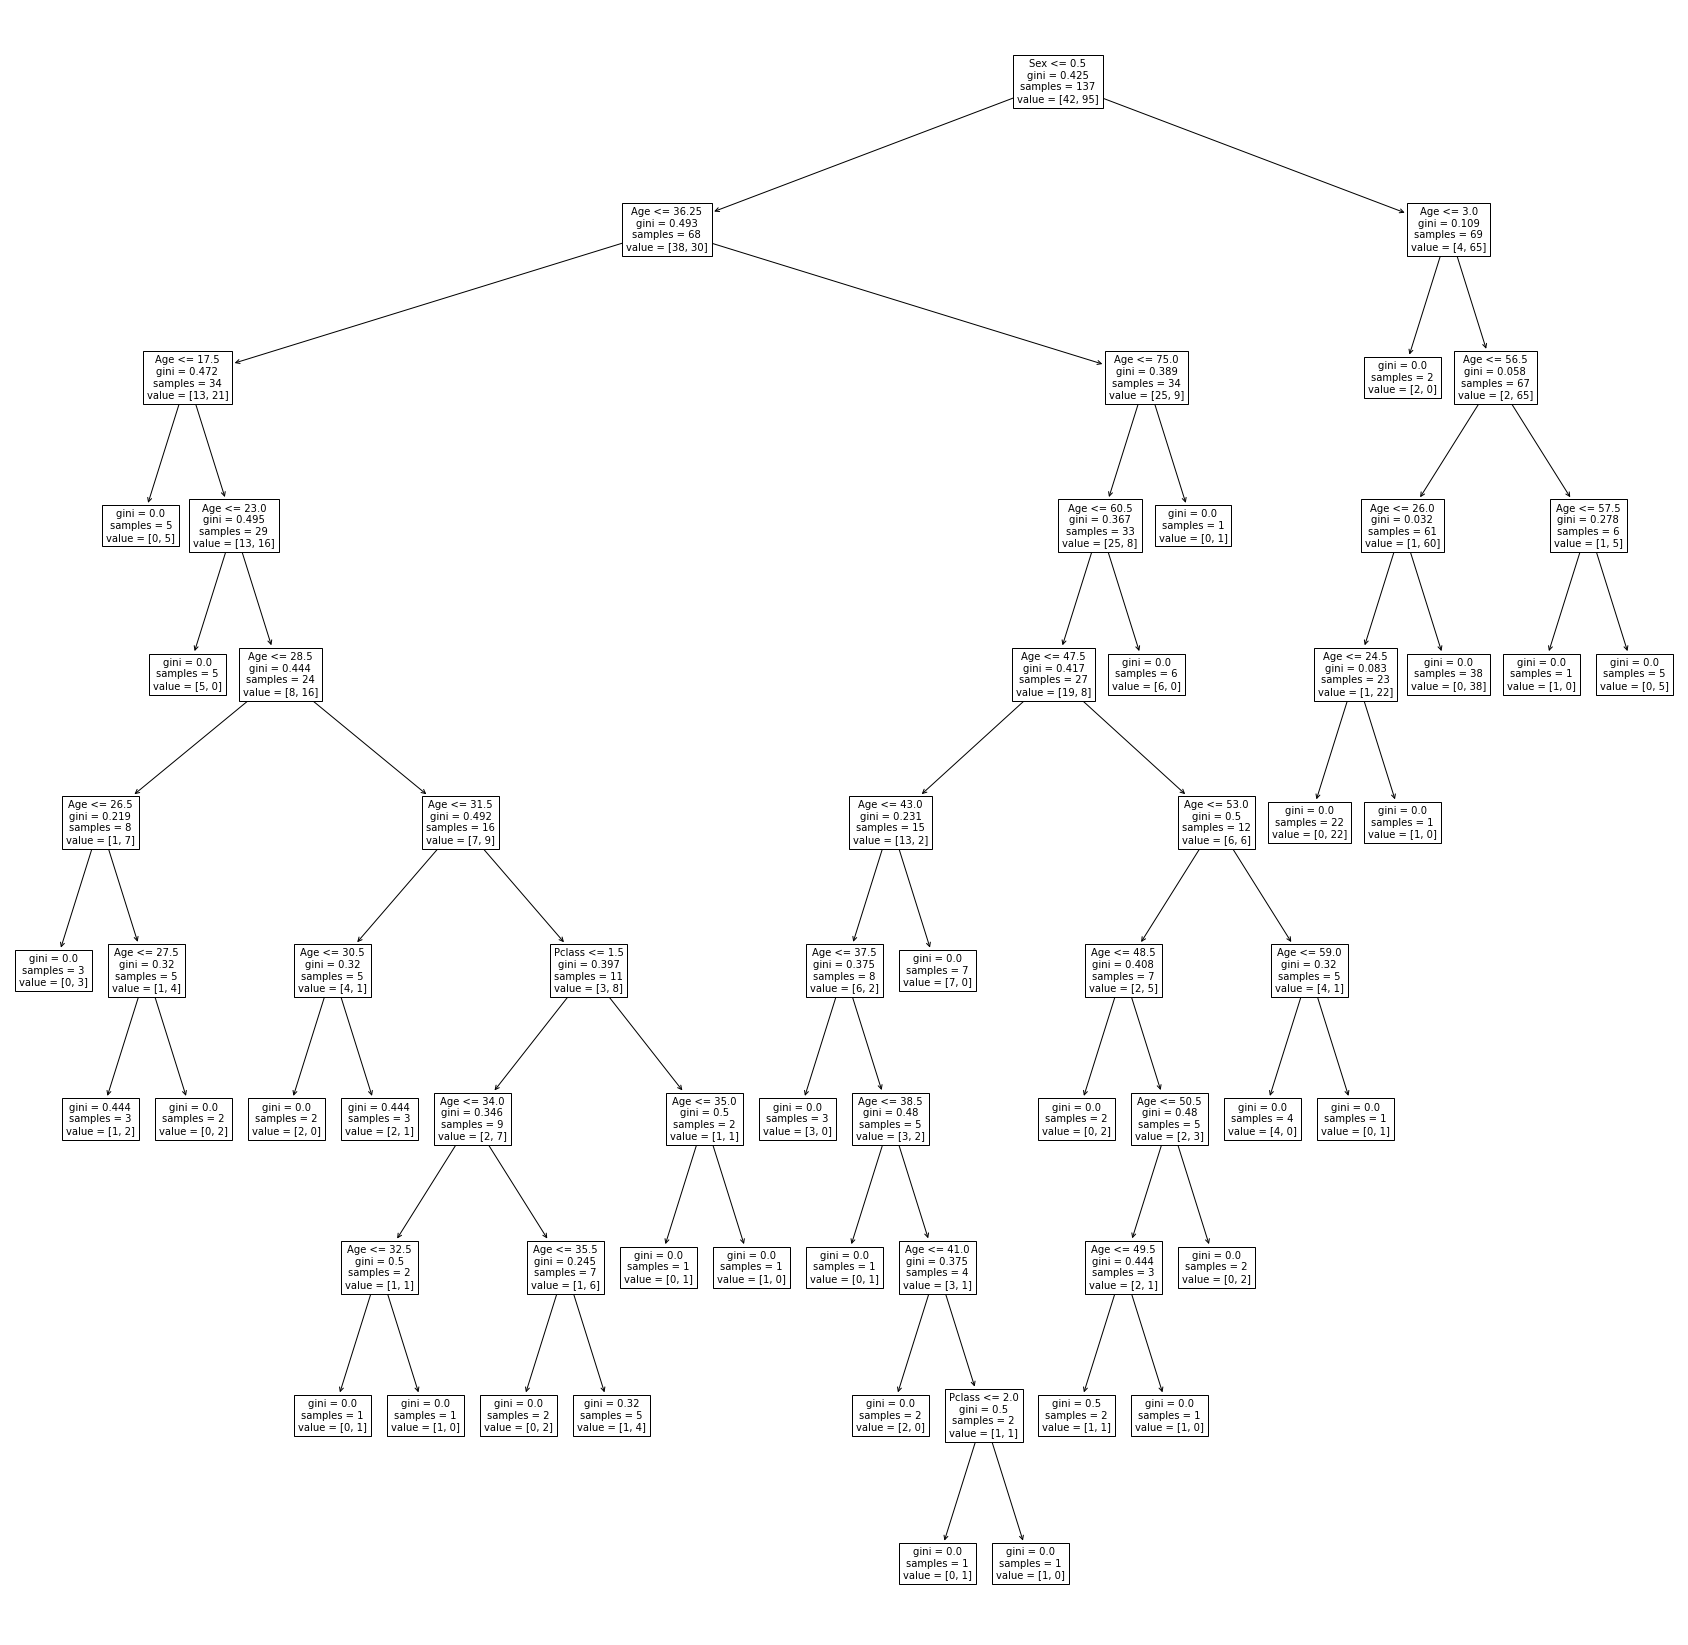

In [43]:
# Podemos visualizar a árvore criada? 
plt.figure(figsize=(30, 30))
plot_tree(tree, fontsize=10, feature_names=X_train.columns)
plt.show()

Agora vamos testar o comportamento dos mesmos dados num modelo de **Florestas Aleatórias**:

In [46]:
floresta = RandomForestClassifier(n_estimators=5)
floresta.fit(X_train, y_train)
Y_pred_label_floresta = floresta.predict(X_test)

In [47]:
accuracy_score(y_test, Y_pred_label_floresta)

0.7391304347826086

## Trabalhando com a AUC

A AUC é a área abaixo da curva ROC. Nós vamos verificar o que esta métrica significa adiante e como ela se compara com outras métricas, como a ACC (acurácia). 

Aqui o importante é saber que para cálculo da AUC nós precisamos das _probabilidades_ de cada exemplo do teste pertencer a alguma das classes! Para obter essas probabilidades, vamos usar o método `predict_proba()`. 

**Em resumo**: 
- **ACC** (acurária): mede a quantidade de acertos do método. Depende dos labels reais e dos _labels preditos_, obtidos com `predict()`; 
- **AUC** (área abaixo da curva ROC): mede o aprendizado global do método, ou seja, o quanto ele performa melhor que uma escolha aleatória. Depende dos labels reais e das _probabilidades_ de cada exemplo pertercer a cada uma das classes, obtidas com `predict_proba()`; 

In [48]:
# Arvore 
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
Y_pred_prob = tree.predict_proba(X_test)

In [49]:
Y_pred_prob

array([[0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0.2, 0.8],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ]])

In [50]:
from sklearn.metrics import roc_auc_score

In [52]:
roc_auc_score(y_test, Y_pred_prob[:,1])

0.7212301587301587

### Iterando por múltiplos modelos

Vamos construir outros modelos e testá-los de uma vez, armazenando os resultados para encontrarmos o mais promissor. 

In [53]:
# "modelos" é uma lista de tuplas, sendo que cada tupla contém o construtor de um 
# modelo de classificação, e seu nome como string
modelos = [
    ( DecisionTreeClassifier(), "1 árvore" ),
    ( RandomForestClassifier(n_estimators=5), "5 árvores" ),
    ( RandomForestClassifier(n_estimators=10), "10 árvores" ),
    ( RandomForestClassifier(n_estimators=100), "100 árvores" ),
]

Aqui estamos iterando por cada modelo da lista `modelos`. Para cada tupla, desenformamos pegando o primeiro elemento e armazenando na variável `classificador`, e o segundo elemento na variável `nome`. 

Para cada classificador, nós treinammos ( com o _fit()_ ) e obtemos as predições dos labels ( com _predict()_ ). Daí calculamos a ACC (acurácia) e imprimimos a resposta. 

In [54]:
for classificador, nome in modelos:
    
    classificador.fit(X_train, y_train)
    probs = classificador.predict_proba(X_test)
    
    auc = roc_auc_score(y_test, probs[:,1])
    
    print(f"Modelo: {nome} | AUC: {auc}")

Modelo: 1 árvore | AUC: 0.7212301587301587
Modelo: 5 árvores | AUC: 0.7867063492063492
Modelo: 10 árvores | AUC: 0.7420634920634921
Modelo: 100 árvores | AUC: 0.7876984126984127


## Construindo o modelo final

Agora que sabemos qual é o melhor modelo que avaliamos, vamos usar TODO o dataset original para criar o modelo final baseado na melhor opção e em todos os dados existentes. 

Este modelo será utilizado para fazer predições de **novos dados**! Preencham: https://forms.gle/p4Z8JWRiYoUanFKw7 

<font color="red"> **IMPORTANTE:** </font> devido às variações aleatórias nas inicializações dos métodos, talvez quando vc executar o código acima novamente outro modelo pode ter o melhor resultado!

Vamos pegar as respostas que vocês deram para prever quem sobreviveria ao desastre do Titanic. Para isso, devemos: 

- Ler os dados
- Fazer os mesmos procedimentos de limpeza que anteriormente
- Selecionar as MESMAS VARIÁVEIS QUE ALIMENTARAM O MODELO, E NA MESMA ORDEM para serem as variáveis que basearão a resposta do modelo

In [ ]:
# Limpando os dados no mesmo formato que antes: Homem -> 0 ; Mulher -> 1


In [ ]:
# Eliminando algumas variáveis inúteis


Aqui vamos pegar as predições do modelo, usando apenas os dados que importam, na ordem adequada.

In [ ]:
# Coluna de saída do modelo


In [ ]:
# Coluna de interpretação do modelo. NOTA: o problema original é verificar os "sobreviventes", 
# logo a classe 1 indica que sobreviveu, e a classe 0 que NÃO sobreviveu
